# Section 0:データの用意 ※省略可

In [1]:
# GoogleDriveをマウント
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
Temp_data = '/content/gdrive/Shareddrives/新出_ゼミ用/20241126_TempAI/Temp'

In [3]:
!ls $Temp_data

Abashiri.csv  Kobe.csv	    Nagoya.csv	Osaka.csv    Tokachi.csv
Fukuoka.csv   Kumagaya.csv  Naha.csv	Sapporo.csv  Tokyo.csv


**lsでファイル名が確認できればSection 0は完了です。**

# Section 1 : データの可視化


In [4]:
#任意のファイルをコピー
!cp $Temp_data/Sapporo.csv .

In [7]:
import pandas as pd

# ファイルパス
file_path = 'Sapporo.csv'

# CSVファイルを読み込む
df = pd.read_csv(file_path, sep=",", encoding="SHIFT-JIS", skiprows=3)

# 列名の余分な空白を削除
df.columns = df.columns.str.strip()

# 不要な列を削除
df = df.drop(columns=['平均気温(℃).1', '平均気温(℃).2'])

# データフレームの内容を確認
print(df.head())


        年月日  平均気温(℃)
0       NaN      NaN
1  2012/4/1      0.1
2  2012/4/2     -0.5
3  2012/4/3      0.8
4  2012/4/4      1.3


In [8]:
#書式確認
print(df.columns)

Index(['年月日', '平均気温(℃)'], dtype='object')


In [11]:
#使いやすいように修正
df["年月日"] = pd.to_datetime(df["年月日"])

df["年"] = df["年月日"].dt.year
df["月"] = df["年月日"].dt.month
df["日"] = df["年月日"].dt.day

df = df.drop(["年月日"], axis =1)
df

,平均気温(℃),年,月,日
0,NaN,NaN,NaN,NaN
1,0.1,2012.0,4.0,1.0
2,-0.5,2012.0,4.0,2.0
3,0.8,2012.0,4.0,3.0
4,1.3,2012.0,4.0,4.0
...,...,...,...,...
3648,7.2,2022.0,3.0,27.0
3649,5.1,2022.0,3.0,28.0
3650,6.9,2022.0,3.0,29.0
3651,4.8,2022.0,3.0,30.0


# Section 2 : データの理解



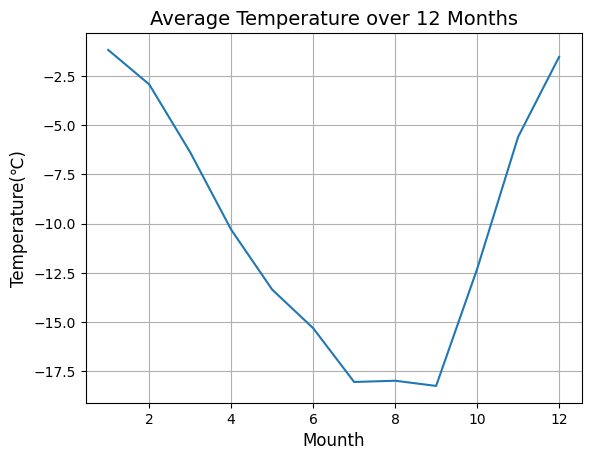

In [ ]:
#データ可視化のライブラリ
import matplotlib.pyplot as plt

#月平均気温の算出
df_month_mean = df.groupby(["月"])["平均気温(℃)"].mean()

#インデックスと値取得
df_month_mean_index =df_month_mean.index
df_month_mean = df_month_mean.values

#グラフ作成と書式
plt.plot(df_month_mean_index, df_month_mean)
plt.title("Average Temperature over 12 Months", fontsize=14)
plt.xlabel("Mounth", fontsize=12)
plt.ylabel("Temperature(℃)", fontsize=12)
plt.grid(True)
plt.show()


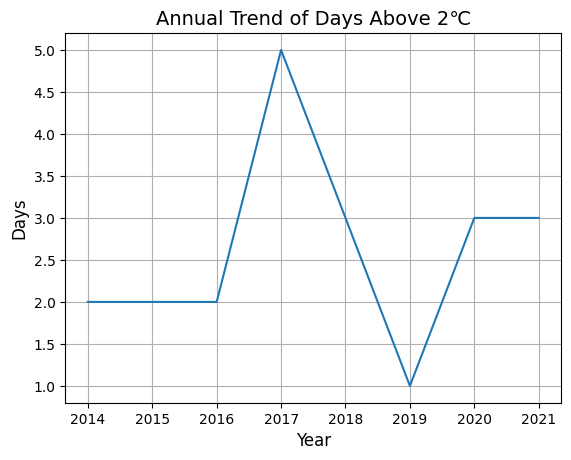

In [ ]:
#平均気温が2℃以上判定
hot_date_bool = (df["平均気温(℃)"] > 2 )

#抽出
hot_date_count = df[hot_date_bool]

#年ごとのカウント
hot_date_count_group = hot_date_count.groupby(["年"])["年"].count()

#年と日数の取得
df_year_count_index = hot_date_count_group.index
df_year_count = hot_date_count_group.values

#グラフ作成と書式
plt.plot(df_year_count_index, df_year_count)
plt.title("Annual Trend of Days Above 2℃", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Days", fontsize=12)
plt.grid(True)
plt.show()

##演習：①任意の温度以上のグラフ　②任意の温度以下のグラフを作成しよう

グラフのタイトルも変更しよう

In [ ]:
#①任意の温度以上のグラフ　Annual Trend of Days Above xx℃

In [ ]:
#②任意の温度以下のグラフ Annual Trend of Days below xx℃

In [ ]:
!cp $Temp_data/Nagoya.csv .

# Section 3 : データの前処理




In [ ]:
#numpyインポート
import numpy as np

#データセット生成(ここでリスト化して処理をしやすくしてる)
def data_set(data):
    x = []
    y = []
    temps = list(data["平均気温(℃)"])

#ループでデータ生成
    for i in range(len(temps)):
        if i < interval : continue
        y.append(temps[i])

#特徴量作成(気温)
        xa =[]

        for j in range(interval):
            k = i + j - interval
            xa.append(temps[k])
        x.append(xa)

    return(x, y)

#教育用データとテストデータ振り分け(train_year->2022年以前を教育用。test_year->2022年以降をテストデータ。)
train_year = (df["年"] <= 2021)
test_year = (df["年"] > 2022)

#過去7日分のデータを使用
interval = 7

#教育用データとテストデータの生成
x_train,y_train = data_set(df[train_year])
x_test, y_test = data_set(df[train_year])


# Section 4 : モデル作成（LinearRegression）


In [ ]:
#Scikit-learnのLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#予測値計算
y_pred = model.predict(x_test)

#テストデータをnumpy配列に変換
y_test =np.array(y_test)

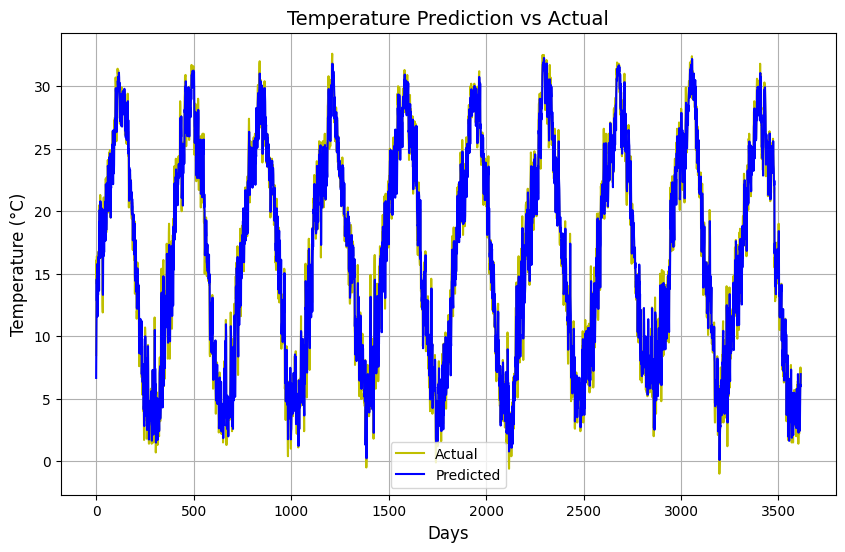

In [ ]:
#グラフ作成と書式
plt.figure(figsize=(10, 6), dpi=100)
plt.title("Temperature Prediction vs Actual", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True)
plt.plot(y_test, c="y", label="Actual")
plt.plot(y_pred, c="b", label="Predicted")
plt.legend()
plt.show()

Kyoto

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#誤差の計算
y_diff = abs(y_pred - y_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#最大誤差
print("Max = ", max(y_diff))

#平均絶対誤差(実際の値と予測値の間の絶対誤差の平均を計算。小さいほうが正確。)
print(f"Mean Absolute Error (MAE): {mae:.2f}°C")

#二乗平均平方根誤差(実際の値と予測値の差を2乗し、それを平均したもの。小さいほうが正確。)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}°C")

Max =  7.638608562063564
Mean Absolute Error (MAE): 1.34°C
Root Mean Squared Error (RMSE): 1.73°C


Sapporo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#誤差の計算
y_diff = abs(y_pred - y_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#最大誤差
print("Max = ", max(y_diff))

#平均絶対誤差(実際の値と予測値の間の絶対誤差の平均を計算。小さいほうが正確。)
print(f"Mean Absolute Error (MAE): {mae:.2f}°C")

#二乗平均平方根誤差(実際の値と予測値の差を2乗し、それを平均したもの。小さいほうが正確。)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}°C")

Max =  8.724579020747216
Mean Absolute Error (MAE): 1.58°C
Root Mean Squared Error (RMSE): 2.07°C
